In [1]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

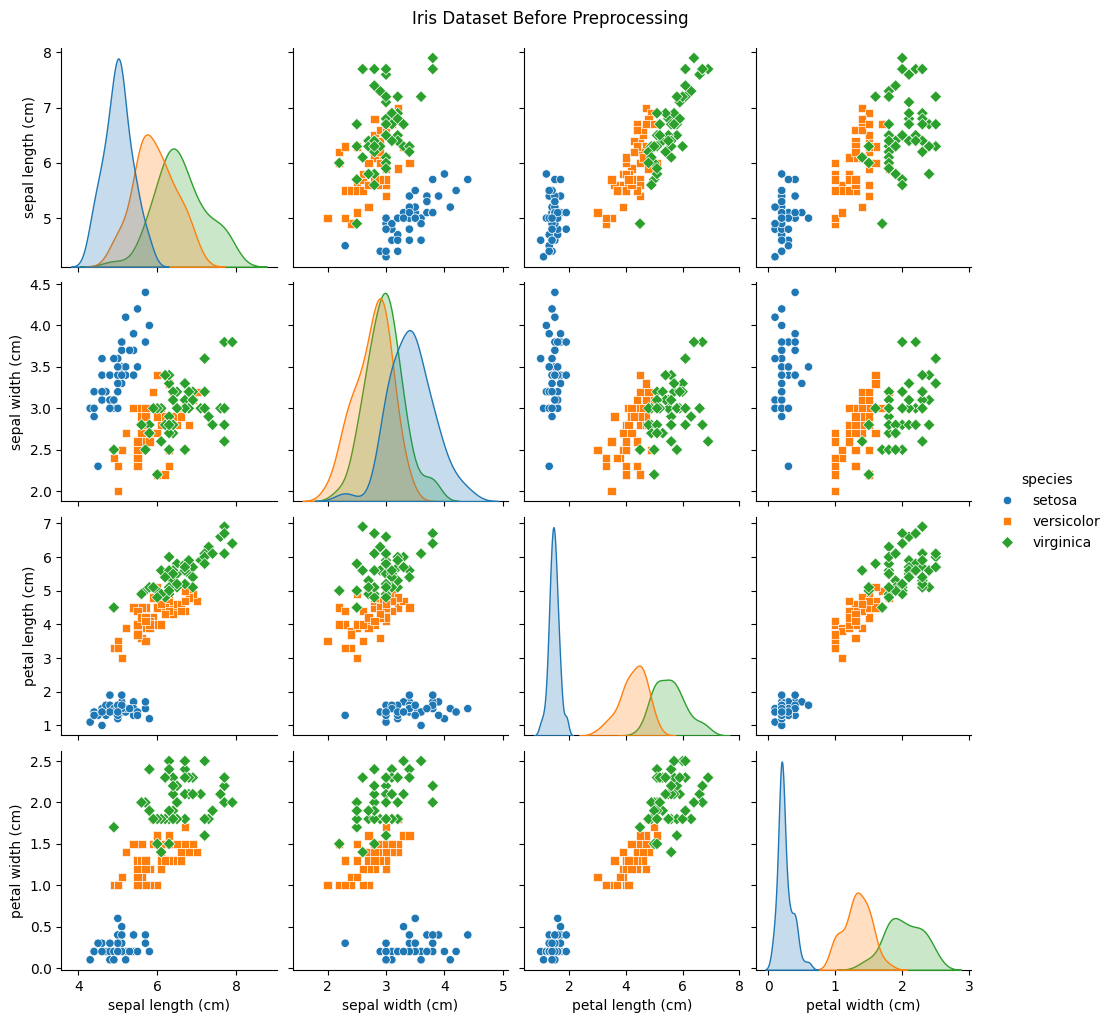

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Pairplot to visualize relationships
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Iris Dataset Before Preprocessing', y=1.02)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled training data to DataFrame for visualization
iris_train_scaled_df = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
iris_train_scaled_df['species'] = y_train
iris_train_scaled_df['species'] = iris_train_scaled_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


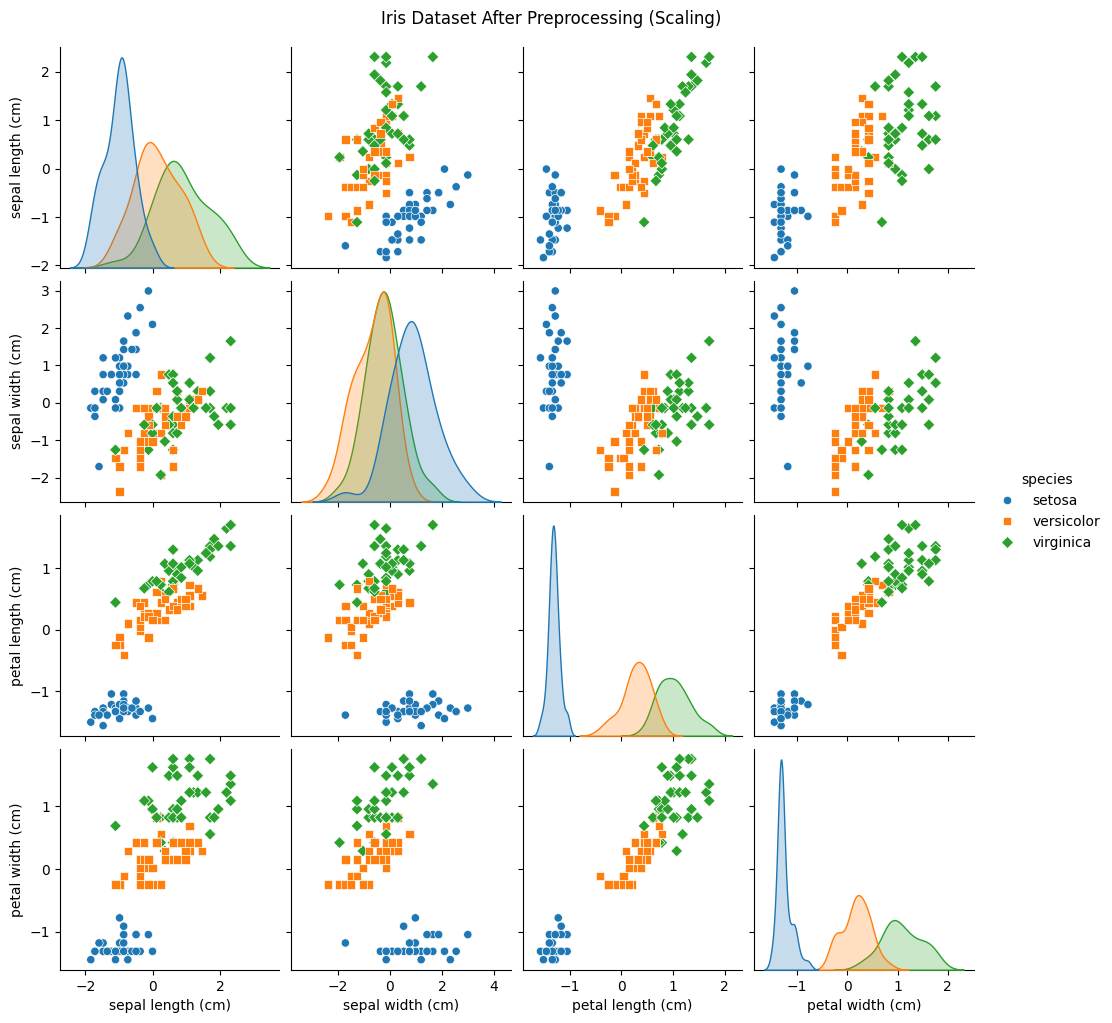

In [8]:
# Pairplot to visualize relationships after scaling
sns.pairplot(iris_train_scaled_df, hue='species', markers=["o", "s", "D"])
plt.suptitle('Iris Dataset After Preprocessing (Scaling)', y=1.02)
plt.show()


In [13]:
from sklearn.linear_model import LogisticRegression
# Initialize the classifier (Logistic Regression)
classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')


Cross-validation accuracy scores: [0.95833333 1.         0.875      1.         0.95833333]
Mean cross-validation accuracy: 0.9583333333333334


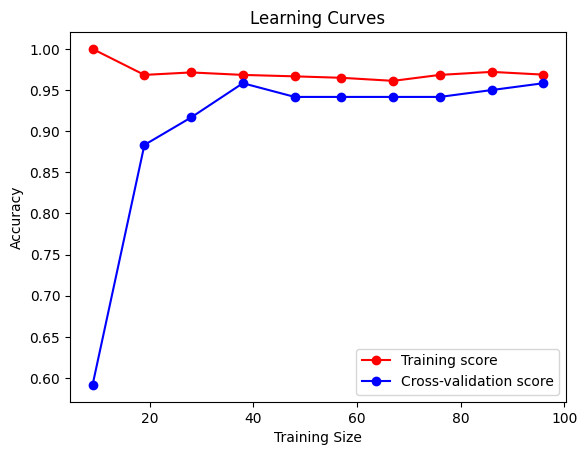

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='b', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning Curves')
plt.show()
